# Importing Libraries

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, auc
from sklearn import metrics

# EDA

In [ ]:
sales_df=pd.read_csv("/content/drive/MyDrive/Final Project/Copy of sales_data_set.csv")
store_df=pd.read_csv("/content/drive/MyDrive/Final Project/Copy of stores_data_set.csv")
feature_df=pd.read_csv("/content/drive/MyDrive/Final Project/Copy of Features_data_set.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
store_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
feature_df


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
sales_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
df=pd.merge(sales_df,store_df,on="Store",how="inner")
df2=pd.merge(df,feature_df,on=["Store","Date"],how="inner")
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,05/02/2010,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,05/02/2010,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,05/02/2010,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,05/02/2010,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,26/10/2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,26/10/2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,26/10/2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [ ]:
df2["MarkDown"]=df2["MarkDown1"]+df2["MarkDown2"]+df2["MarkDown3"]+df2["MarkDown4"]+df2["MarkDown5"]
df2.drop(columns=["MarkDown5","MarkDown4","MarkDown3","MarkDown2","MarkDown1"],inplace=True)
df2.drop(columns=["IsHoliday_y"],inplace=True)
df2["IsHoliday_x"]=np.where((df2["IsHoliday_x"]==False),0,df2["IsHoliday_x"])
df2["IsHoliday_x"]=np.where((df2["IsHoliday_x"]==True),1,df2["IsHoliday_x"])
df2["MarkDown"]=np.where((df2["MarkDown"].isna()==True),0,df2["MarkDown"])
df2["Type"]=np.where((df2["Type"]=="C"),3,df2["Type"])
df2["Type"]=np.where((df2["Type"]=="B"),2,df2["Type"])
df2["Type"]=np.where((df2["Type"]=="A"),1,df2["Type"])
df2


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown
0,1,1,05/02/2010,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,0.00
1,1,2,05/02/2010,50605.27,0,1,151315,42.31,2.572,211.096358,8.106,0.00
2,1,3,05/02/2010,13740.12,0,1,151315,42.31,2.572,211.096358,8.106,0.00
3,1,4,05/02/2010,39954.04,0,1,151315,42.31,2.572,211.096358,8.106,0.00
4,1,5,05/02/2010,32229.38,0,1,151315,42.31,2.572,211.096358,8.106,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,0,2,118221,58.85,3.882,192.308899,8.667,5247.26
421566,45,94,26/10/2012,5203.31,0,2,118221,58.85,3.882,192.308899,8.667,5247.26
421567,45,95,26/10/2012,56017.47,0,2,118221,58.85,3.882,192.308899,8.667,5247.26
421568,45,97,26/10/2012,6817.48,0,2,118221,58.85,3.882,192.308899,8.667,5247.26


<ipython-input-6-150bdeb54b2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df2.corr()


<Axes: >

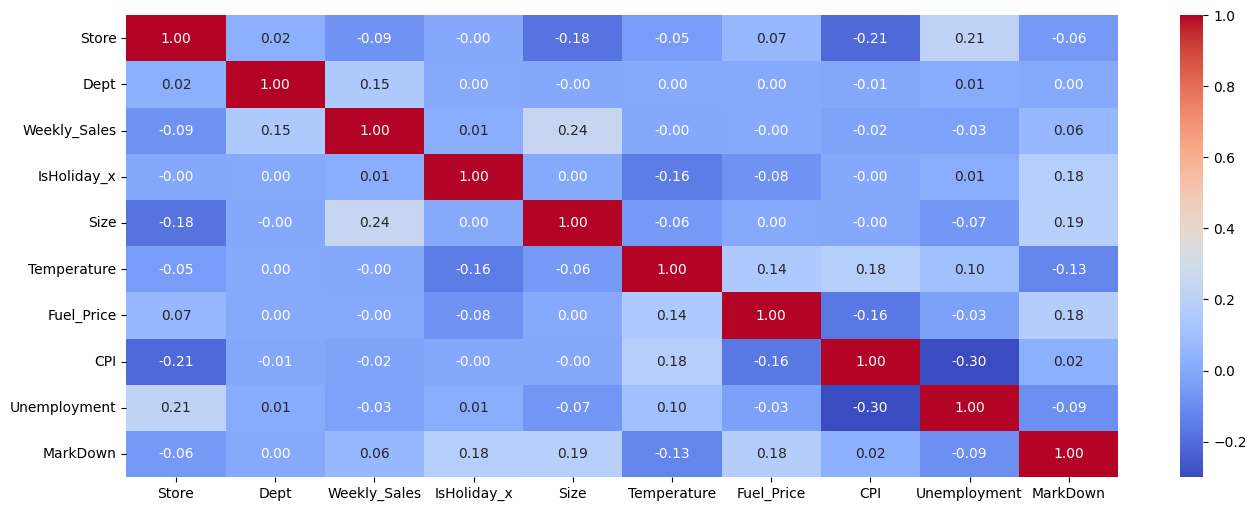

In [ ]:
cor=df2.corr()
plt.figure(figsize=(16,6))
sns.heatmap(cor,annot=True,cmap="coolwarm",fmt=".2f")

In [ ]:
from dataprep.eda import create_report
create_report(df2)

Output hidden; open in https://colab.research.google.com to view.

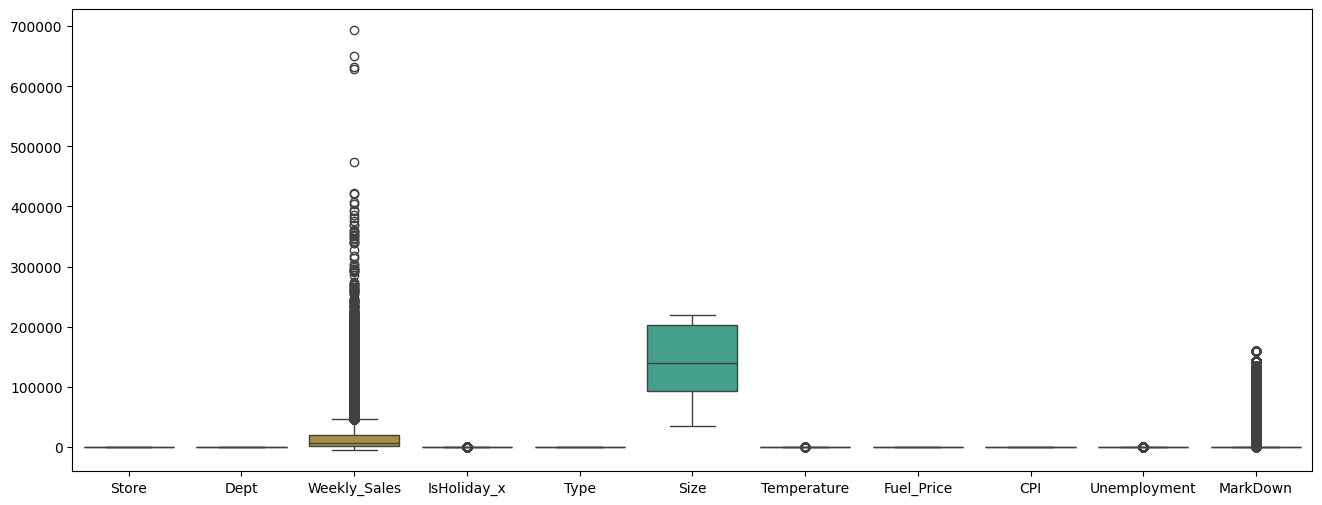

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df2)
plt.show()

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()
#df2["Weekly_Sales"]=st.fit_transform(df2[["Weekly_Sales"]])
df2["MarkDown"]=st.fit_transform(df2[["MarkDown"]])
df2["CPI"]=st.fit_transform(df2[["CPI"]])
df2["Size"]=st.fit_transform(df2[["Size"]])

In [ ]:
df2["Date"]=pd.to_datetime(df2["Date"], format='%d/%m/%Y')
df2["Year"]=df2["Date"].dt.year
df2["week"]=df2["Date"].dt.isocalendar().week
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  int64         
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  float64       
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  MarkDown      421570 non-null  float64       
 12  Year          421570 non-null  int64         
 13  week          421570 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(7), int64(4), object(1)
mem

In [ ]:
df2.drop(columns="Date",inplace=True)
# df2

# Feature Importances

In [ ]:
from sklearn.ensemble import RandomForestRegressor
fs_model = RandomForestRegressor(n_estimators=20,random_state=40)
x = df2.drop('Weekly_Sales',axis=1)
y = df2['Weekly_Sales']
fs_model.fit(x,y)

In [ ]:
fs_model.feature_importances_
dd=pd.DataFrame({
    "column": x.columns,
    "Score": fs_model.feature_importances_ *100
}).sort_values('Score',ascending=False)

In [ ]:
dd

,column,Score
1,Dept,63.015443
4,Size,19.122912
0,Store,5.650971
11,week,4.842570
7,CPI,2.731002
3,Type,1.428595
8,Unemployment,1.112447
5,Temperature,1.089738
6,Fuel_Price,0.540458
9,MarkDown,0.221245


As per the above findings, the most important features will be taken into considerartions for Model Building

# MODEL with Markdown(RandomForestRegressor)

In [ ]:
x=df2[["Dept","Size","Store","week","CPI","Type","Unemployment","Temperature","MarkDown"]]
y=df2["Weekly_Sales"]
# model = RandomForestRegressor(n_estimators=50,random_state=40)
# model.fit(x,y)

In [ ]:
predicted_result = model.predict(x)
from sklearn.metrics import r2_score
r2 = r2_score(y,predicted_result)
print(r2)

0.9965039230058087


# MODEL without Markdown(RandomForestRegressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x=df2[["Dept","Size","Store","week","CPI","Type","Unemployment","Temperature"]]
y=df2["Weekly_Sales"]
model = RandomForestRegressor(n_estimators=50,random_state=40)
model.fit(x,y)

In [ ]:
predicted_result = model.predict(x)
from sklearn.metrics import r2_score
r2 = r2_score(y,predicted_result)
print(r2)

0.9965565998887862


Both model with or without Markdown has more or less evenly accurate. However, a model without markdown into consideration has better performance.

# Finding Polynomial degree for the Model

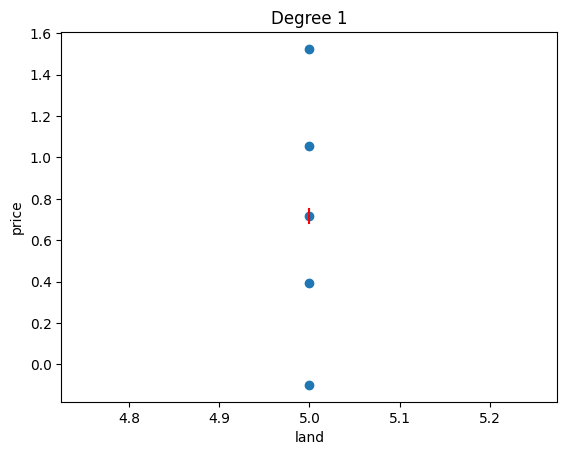

******************************************


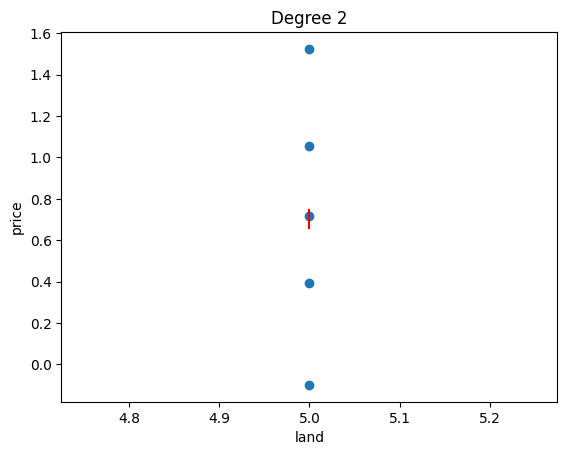

******************************************


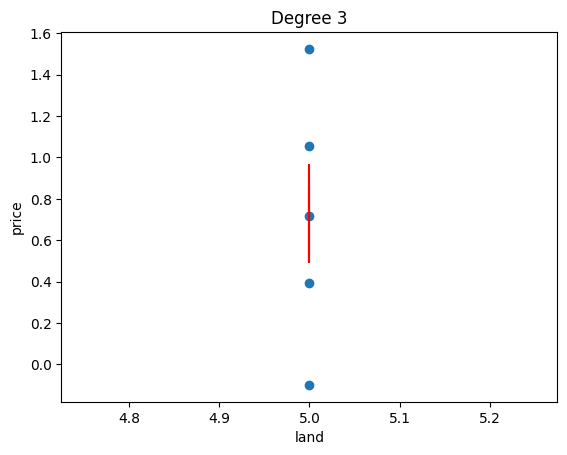

******************************************


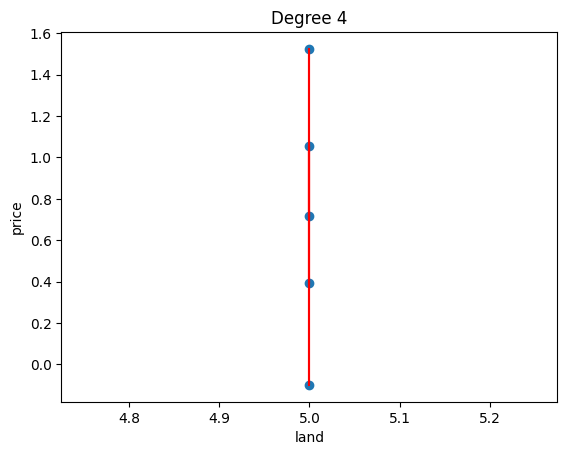

******************************************


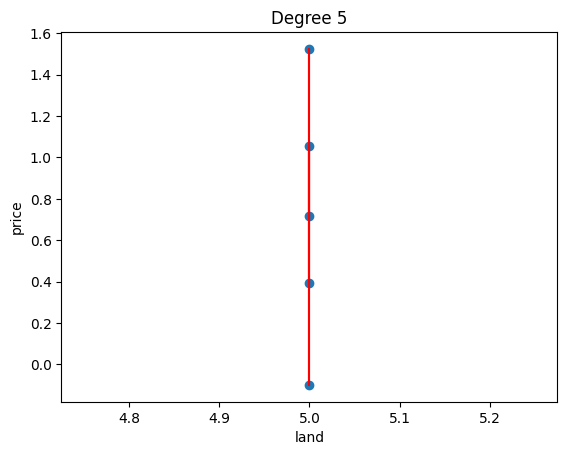

******************************************


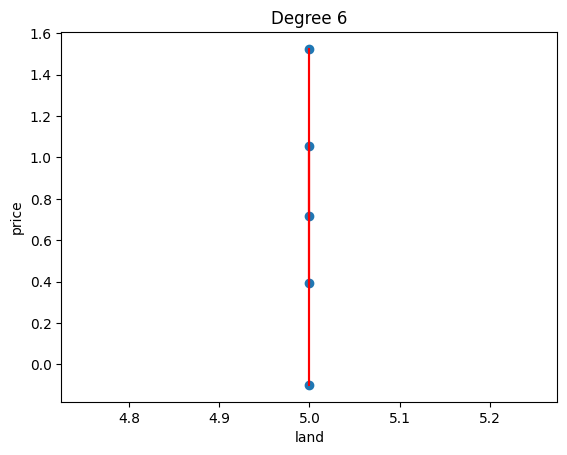

******************************************


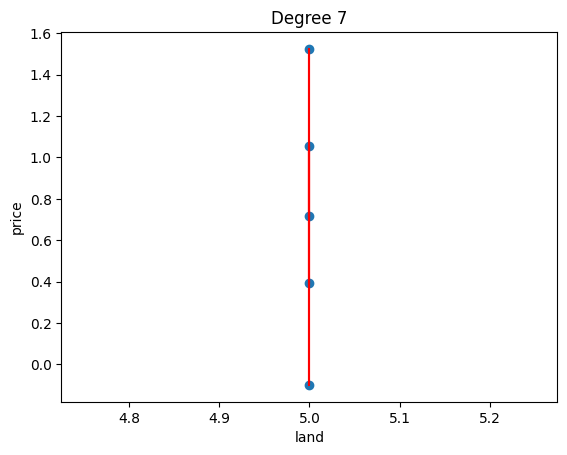

******************************************


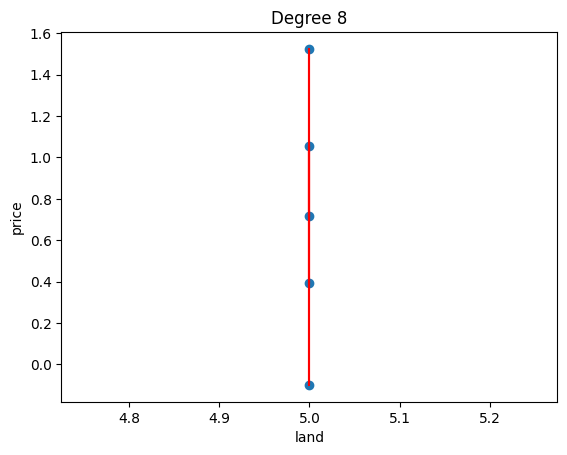

******************************************


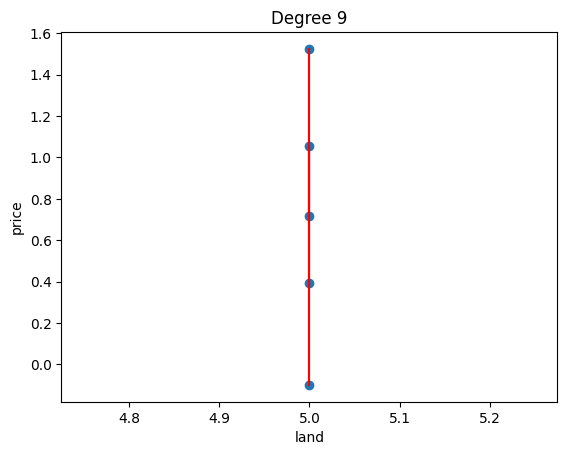

******************************************


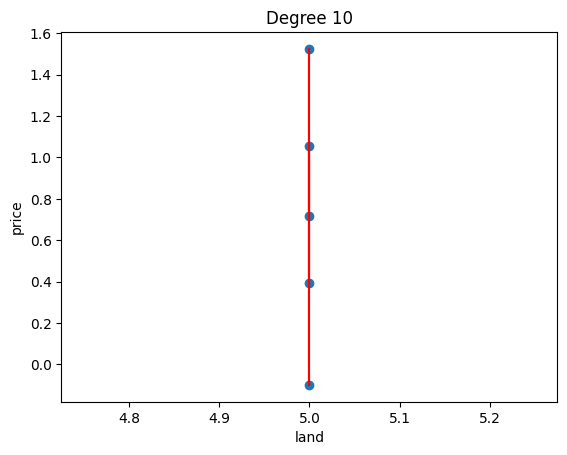

******************************************


In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10]:
  poly=PolynomialFeatures(degree=i)
  x_poly=poly.fit_transform(x)
  model=LinearRegression().fit(x_poly,y)
  plt.scatter(x["week"],y)
  y_pred=model.predict(x_poly)
  plt.plot(x["week"],y_pred,color="r")
  plt.title("Degree "+str(i))
  plt.xlabel("land")
  plt.ylabel("price")
  plt.show()
  print("******************************************")

A degree of 2 or 3 is ideal for the balance between Bias And variance

# Random forest regressor with polynomial degree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#df2=pd.read_csv("/content/drive/MyDrive/Final Project/Finaldf.csv")
x=df2[["Dept","Size","Store","week","CPI","Type","Unemployment","Temperature"]]
y=df2["Weekly_Sales"]

In [ ]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
model = RandomForestRegressor(n_estimators=50,random_state=40)
model.fit(x_poly,y)

RandomForestRegressor(n_estimators=50, random_state=40)

In [ ]:
predicted_result = model.predict(x_poly)
from sklearn.metrics import r2_score
r2 = r2_score(y,predicted_result)
print(r2)

0.9962683834373204


In [ ]:
model.predict()

# Saving the Model

In [ ]:
import pickle
with open("model_rf.pkl","wb") as file:
    pickle.dump(model, file)

In [ ]:
with open("model_rf.pkl","rb") as file:
    new_model = pickle.load(file)

In [ ]:
poly=PolynomialFeatures(degree=2)
c=np.array([[1,0.26,1,5,1.01,1,8,43]])
x_poly=poly.fit_transform(c)
p=model.predict(x_poly)[0]
p

26620.3126

In [ ]:
x

,Dept,Size,Store,week,CPI,Type,Unemployment,Temperature
0,1,0.239209,1,5,1.018774,1,8.106,42.31
1,2,0.239209,1,5,1.018774,1,8.106,42.31
2,3,0.239209,1,5,1.018774,1,8.106,42.31
3,4,0.239209,1,5,1.018774,1,8.106,42.31
4,5,0.239209,1,5,1.018774,1,8.106,42.31
...,...,...,...,...,...,...,...,...
421565,93,-0.303489,45,43,0.539003,2,8.667,58.85
421566,94,-0.303489,45,43,0.539003,2,8.667,58.85
421567,95,-0.303489,45,43,0.539003,2,8.667,58.85
421568,97,-0.303489,45,43,0.539003,2,8.667,58.85


# Compressed pickle Model

In [ ]:
import bz2file as bz2
import pickle
with bz2.BZ2File("newfile.pbz2", "w") as f:
  pickle.dump(model, f)

In [ ]:
data = bz2.BZ2File("newfile.pbz2", "rb")
mod=pickle.load(data)

In [ ]:
poly=PolynomialFeatures(degree=2)
c=np.array([[95,0.23,1,5,1.01,1,8,42]])
x_poly=poly.fit_transform(c)
p=model.predict(x_poly)[0]
p

104097.15719999997

# Outcomes

Since Dept feature has a prominent importance in this model, we will be finding out which Dept has more capablity to do the sales

<Axes: xlabel='Dept', ylabel='Pred'>

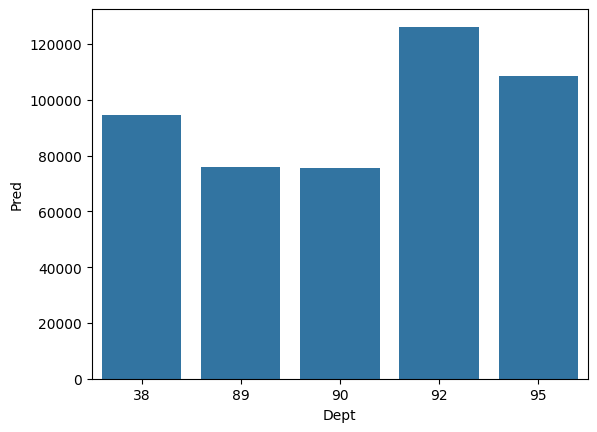

In [ ]:
weekly_Sales_prediction=[]
for i in range(1,100):
  c=np.array([[i,0.23,1,22,1.01,1,8,42]])
  x_poly=poly.fit_transform(c)
  p=model.predict(x_poly)[0]
  weekly_Sales_prediction.append(p)
ds=pd.DataFrame({"Dept":range(1,100),"Pred":weekly_Sales_prediction})
df=ds.sort_values(by="Pred",ascending=False)
sns.barplot(x="Dept", y="Pred",data=df.head(5))


<Axes: xlabel='Dept', ylabel='Pred'>

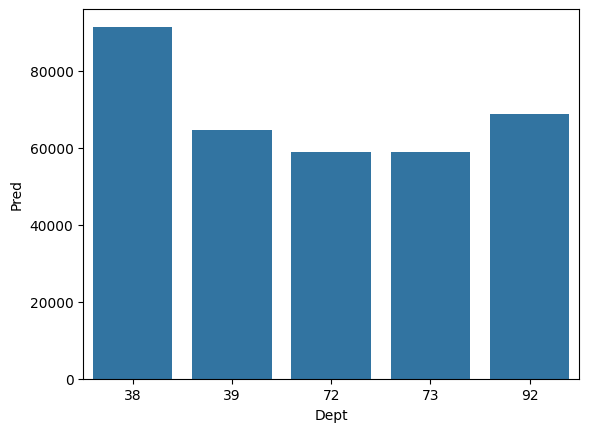

In [ ]:
weekly_Sales_prediction=[]
for i in range(1,100):
  c=np.array([[i,0.23,2,22,1.01,2,8,42]])
  x_poly=poly.fit_transform(c)
  p=model.predict(x_poly)[0]
  weekly_Sales_prediction.append(p)
ds=pd.DataFrame({"Dept":range(1,100),"Pred":weekly_Sales_prediction})
df=ds.sort_values(by="Pred",ascending=False)
sns.barplot(x="Dept", y="Pred",data=df.head(5))


<Axes: xlabel='Dept', ylabel='Pred'>

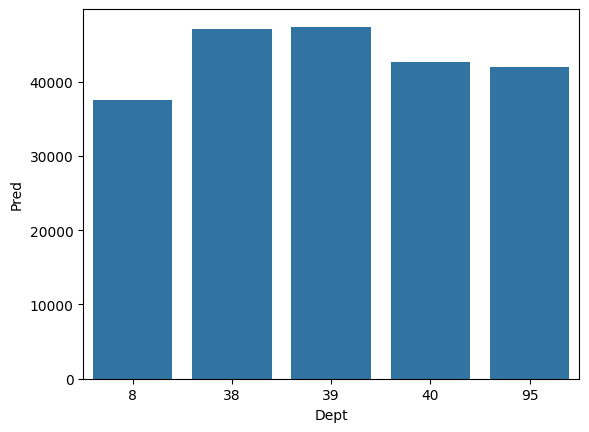

In [ ]:
weekly_Sales_prediction=[]
for i in range(1,100):
  c=np.array([[i,-0.33,45,22,1.01,2,8,42]])
  x_poly=poly.fit_transform(c)
  p=model.predict(x_poly)[0]
  weekly_Sales_prediction.append(p)
ds=pd.DataFrame({"Dept":range(1,100),"Pred":weekly_Sales_prediction})
df=ds.sort_values(by="Pred",ascending=False)
sns.barplot(x="Dept", y="Pred",data=df.head(5))


Upon checking with ideal and dynamic feature changes, Dept 38,39,92 has a chance to get more revenue to Store

In [ ]:
x

,Dept,Size,Store,week,CPI,Type,Unemployment,Temperature
0,1,0.239209,1,5,1.018774,1,8.106,42.31
1,2,0.239209,1,5,1.018774,1,8.106,42.31
2,3,0.239209,1,5,1.018774,1,8.106,42.31
3,4,0.239209,1,5,1.018774,1,8.106,42.31
4,5,0.239209,1,5,1.018774,1,8.106,42.31
...,...,...,...,...,...,...,...,...
421565,93,-0.303489,45,43,0.539003,2,8.667,58.85
421566,94,-0.303489,45,43,0.539003,2,8.667,58.85
421567,95,-0.303489,45,43,0.539003,2,8.667,58.85
421568,97,-0.303489,45,43,0.539003,2,8.667,58.85
